# Unit 7 Linear Regression
## Activity: Fitting a linear regression line using intuitive visual approach.


This script allows you to interact with the figures and adjust the intercept and slope
of the line. 

Example data are taken from Collaborative Statistics Book Fig. 12.7:

**Third exams score and Final exams score**

In [3]:
# -*- coding: utf-8 -*-
"""

@author: Oliver Elison Timm

History:
2022-04-27 removed all interactive widgets and converted into 
           regular notebook activity. 

"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
%matplotlib inline

### Example data: Third exam scores and final exam scores

In [4]:
##############################################################
# Grade scores for the third (x) and final exam (y)
##############################################################
x=np.array([ 65, 67, 71, 71, 66, 75, 67, 70, 71, 69, 69])
y=np.array([175,133,185,163,126,198,153,163,159,151,159])

    

In [5]:
# Function that calculates the SSE
def SSE(x,y,slope,intercept=0):
    """Calculate SSE for a guessed linear regression line
    
    Input parameter:
        x,y (1d numpy array): 
            the numpy arrays with the data points
        slope (float): 
            real value for the regression line slope
        
        intercept (float): intercept of the line (default 0)
    Returns:
        The SSE value (float)
    """
    yhat=intercept+slope*x
    error=y-yhat
    result=0
    for e in error:
        result=result+e**2
    return result

## Task 1: Enter slope and intercept and calculate fitted the line

#### Calculates the SSE

What is visually the best fitting line? Adjust the slope and estimate visually the line that intuitively fits best to the data. Here, we work with the absolute scores, below we will work with centered data.


In [6]:
a=float(input("Enter intercept a ="))
b=float(input("Enter slope b = "))


yguess=a+b*x # x contains the third grade values
# collect data information to show as data table
print("Estimated final grades with regression line")
print(f"yguess= {a:.2f} + {b:.2}*x")

dfout=pd.DataFrame({'third_exam':x,'final_exam':y,
                    'regression_line_final_exam':np.round(yguess,2)})
dfout['squared error']=(y-yguess)**2

sse_guessed=SSE(x,y,slope=b,intercept=a)
print(f"SSE for this guessed regression line: SSE = {sse_guessed:.2f}")


print(40*"=")
dfout

Enter intercept a = 20
Enter slope b =  6


Estimated final grades with regression line
yguess= 20.00 + 6.0*x
SSE for this guessed regression line: SSE = 832213.00


,third_exam,final_exam,regression_line_final_exam,squared error
0,65,175,410.0,55225.0
1,67,133,422.0,83521.0
2,71,185,446.0,68121.0
3,71,163,446.0,80089.0
4,66,126,416.0,84100.0
5,75,198,470.0,73984.0
6,67,153,422.0,72361.0
7,70,163,440.0,76729.0
8,71,159,446.0,82369.0
9,69,151,434.0,80089.0


In [ ]:
# check the SSE result using 
#dfout['squared error'].sum()

### Plot the guessed fitted line

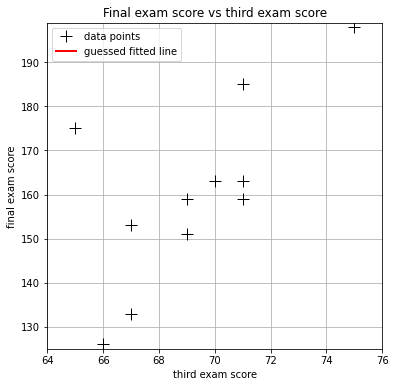

In [8]:
# need the min max range of the data to adjust sample spaces
# for the following linear regression analysis
xmin=int(np.min(x))-1
xmax=int(np.max(x))+1
ymin=int(np.min(y))-1
ymax=int(np.max(y))+1
x0=np.linspace(xmin,xmax,10)


fig,ax = plt.subplots(1,1,figsize=(6,6))


plt.plot(x,y,'+',markersize=12,color='black',label='data points')
ax.plot(x,yguess,lw=2,color='red',label='guessed fitted line') 
ax.text
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.set_xlabel("third exam score")
ax.set_ylabel("final exam score")
plt.title('Final exam score vs third exam score')

plt.legend()
plt.grid()
plt.show()

## Task 2: Work with centered data
## Enter slope and intercept and calculate fitted the line

#### Calculates the SSE


Here, we work with the centered data. The intercept we set to zero and 
just test various slope values.


In [9]:
# We center the data around their mean values
# for illustrative purposes
# that allows us to work with intercept 0 
# and focus on finding the best fitting slope
x=x-np.mean(x)
y=y-np.mean(y)

a=0
b=float(input("Enter slope b = "))


yguess=a+b*x # x contains the third grade values
# collect data information to show as data table
print("Estimated final grades with regression line")
print(f"yfit= {a:.2f} + {b:.2}*x")
dfout=pd.DataFrame({'third_exam':x,'final_exam':y,
                    'regression_line_final_exam':np.round(yguess,2)})
dfout['squared error']=(y-yguess)**2
sse_guessed=SSE(x,y,slope=b,intercept=a)
print(f"SSE for this guessed regression line: SSE = {sse_guessed:.2f}")
dfout 

Enter slope b =  6


Estimated final grades with regression line
yfit= 0.00 + 6.0*x
SSE for this guessed regression line: SSE = 2536.55


,third_exam,final_exam,regression_line_final_exam,squared error
0,-4.181818,14.545455,-25.09,1571.041322
1,-2.181818,-27.454545,-13.09,206.314050
2,1.818182,24.545455,10.91,185.950413
3,1.818182,2.545455,10.91,69.950413
4,-3.181818,-34.454545,-19.09,236.041322
5,5.818182,37.545455,34.91,6.950413
6,-2.181818,-7.454545,-13.09,31.768595
7,0.818182,2.545455,4.91,5.586777
8,1.818182,-1.454545,10.91,152.859504
9,-0.181818,-9.454545,-1.09,69.950413


### Plot the guessed fitted line

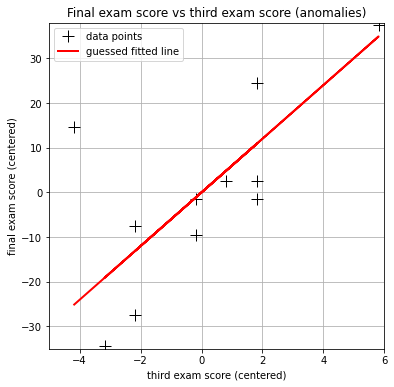

In [10]:
# need the min max range of the data to adjust sample spaces
# for the following linear regression analysis
xmin=int(np.min(x))-1
xmax=int(np.max(x))+1
ymin=int(np.min(y))-1
ymax=int(np.max(y))+1
x0=np.linspace(xmin,xmax,10)

fig,ax = plt.subplots(1,1,figsize=(6,6))

plt.plot(x,y,'+',markersize=12,color='black',label='data points')
ax.plot(x,yguess,lw=2,color='red',label='guessed fitted line') 
ax.text
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.set_xlabel("third exam score (centered)")
ax.set_ylabel("final exam score (centered)")
plt.title('Final exam score vs third exam score (anomalies)')

plt.legend()
plt.grid()
plt.show()




### Task 3: Test multiple values for the slope b and collect the resulting SSE
#### Collect the slope and corresponding SSE values in lists, then plot the SSE over the slope values.


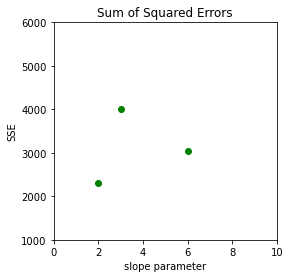

In [11]:
slope_list= [ 2, 3, 6] # example values
sse_list = [2300, 4000, 3032] # example values

min_slope,max_slope=0,10
min_sse,max_sse = 1000, 6000

fig,ax = plt.subplots(1,1,figsize=(4,4))
ax.set_ylim([min_sse,max_sse])
ax.set_xlim([min_slope,max_slope])
ax.set_xlabel("slope parameter")
ax.set_ylabel("SSE")
ax.plot(slope_list,sse_list,'o',color='green')
plt.title("Sum of Squared Errors")
plt.show()


### Task 5: What is the slope for the best fitting line  that minimizes the Sum of Squared Errors? 
#### (work with centered data)
Use the graph as support to find the best fitting slope parameter.
And compare it with the scipy function _linregress()_ results.
